In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem Statement:

##Clustering:

###Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

In [ ]:
path_excel="/content/drive/MyDrive/pca/Clustering_Clean_Ads_Data.xlsx"
df1= pd.read_excel(path_excel)

In [ ]:
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


###Problem 1.1 -
 Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables

In [ ]:
df1.shape

(23066, 19)

In [ ]:
df1.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df1.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


<Axes: xlabel='Ad - Length', ylabel='Count'>

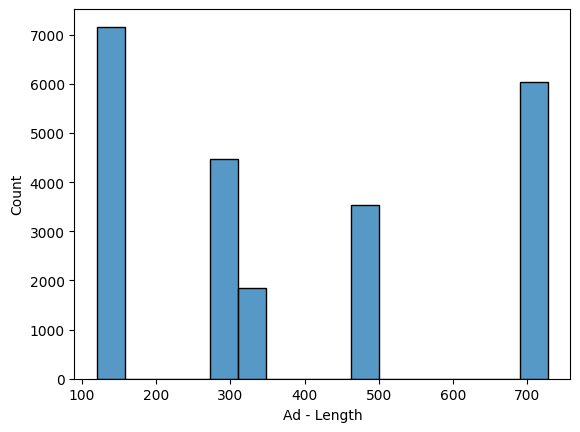

In [ ]:
sns.histplot(data=df1, x='Ad - Length')

The median ad-length is 300 units. While the highest no. of ads are between 120 to 150 units in length. The second highest is 690 to 720 units long in length.

<Axes: xlabel='Ad- Width', ylabel='Count'>

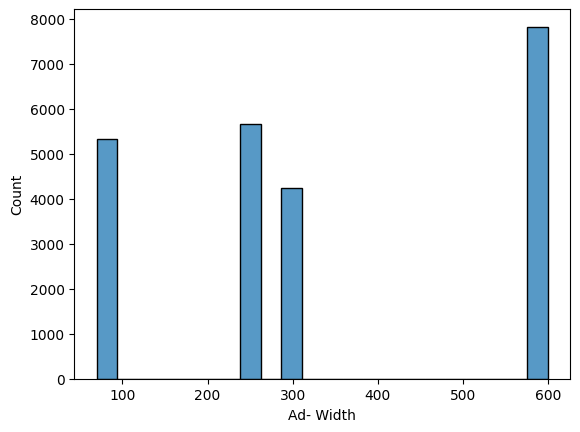

In [ ]:
sns.histplot(data=df1, x='Ad- Width')

The median is 300 units. Highest ad width is 600 units.

<Axes: xlabel='Ad Size'>

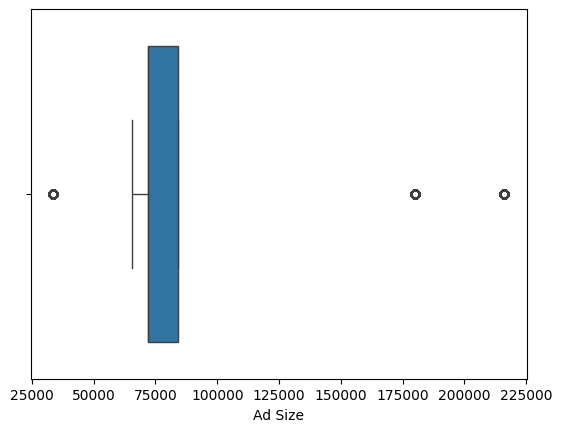

In [ ]:
sns.boxplot(data=df1, x='Ad Size')

Median ad size is 72000 units. Highest ad size is 216000.

<Axes: xlabel='Available_Impressions', ylabel='Impressions'>

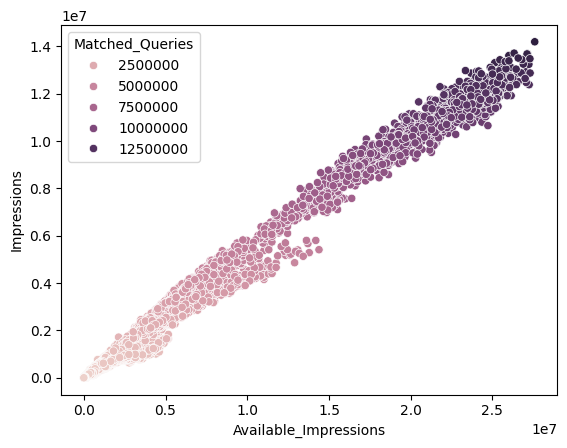

In [ ]:
sns.scatterplot(data=df1, x='Available_Impressions', y='Impressions',hue='Matched_Queries')

There is positive corelation between  Available Impressions and Impressions. The size of matched queries increases as x and y axis increase.

<Axes: xlabel='Clicks', ylabel='Spend'>

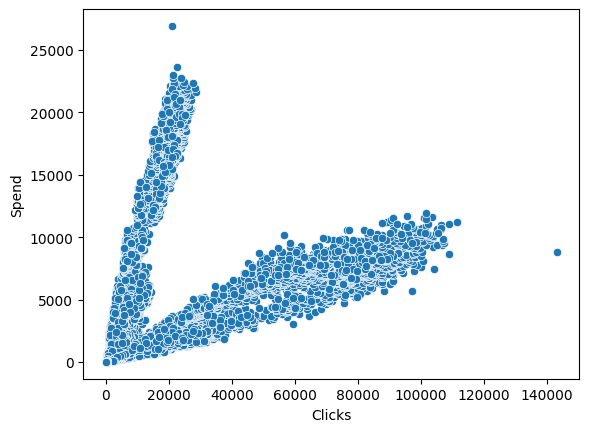

In [ ]:
sns.scatterplot(data=df1, x='Clicks',y='Spend')

There are two type of corelation between clicks and spend. Both of them positive.

<Axes: xlabel='Fee', ylabel='Revenue'>

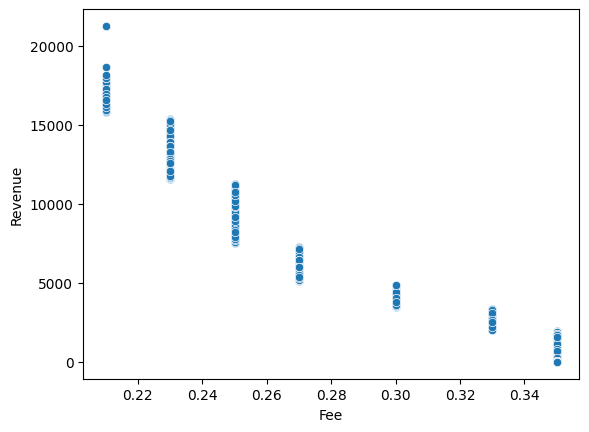

In [ ]:
sns.scatterplot(data=df1, x='Fee',y='Revenue')

There is negative corelation between fee and revenue.

<Axes: xlabel='CTR', ylabel='CPM'>

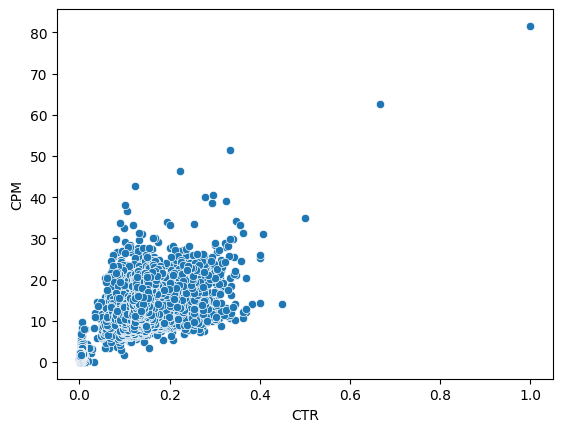

In [ ]:
sns.scatterplot(data=df1, x='CTR', y='CPM')

There is a positive corelation between CTR and CPM.

<Axes: xlabel='CPC'>

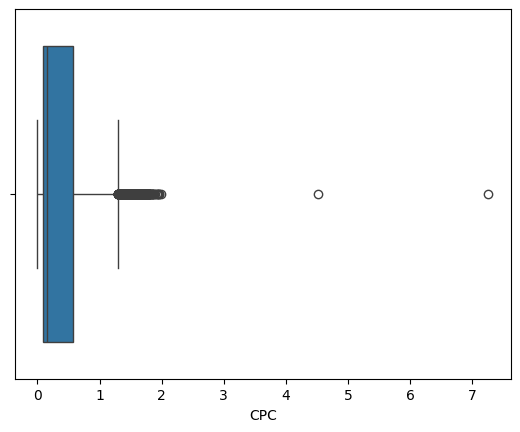

In [ ]:
sns.boxplot(data=df1, x='CPC')

The median of CPC is 0.160000. The highest of CPC is 7.26000.

###Problem 1.2 -
Data Preprocessing
- Missing value check and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given.

In [ ]:
df1.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
def calculate_cpm(x):
  spend=df1.Spend
  impression = df1.Impressions
  cpm= (spend/impression)*1000
  return cpm

In [ ]:
df1['CPM'] = df1[['CPM']].apply(lambda x: calculate_cpm(x))

In [ ]:
def calculate_cpc(x):
  spend = df1.Spend
  click = df1.Clicks
  cpc = (spend/click)
  return cpc



In [ ]:
df1['CPC'] = df1[['CPC']].apply(lambda x: calculate_cpc(x))

In [ ]:
def calculate_ctr(x):
  click = df1.Clicks
  impression = df1.Impressions
  ctr = (click/impression)
  return ctr

In [ ]:
df1['CTR'] = df1[['CTR']].apply(lambda x: calculate_ctr(x))

In [ ]:
df1.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
df1.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.084099,8.396849,0.336678
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.092620,9.057760,0.341253
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000109,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002651,1.749084,0.089736
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.093912,8.371566,0.139347
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.134706,13.042018,0.546242
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,2.000000,715.000000,7.264000


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(df1['Ad Size'])
print("lower range",lr, "and upper range", ur)

lower range 54000.0 and upper range 102000.0


In [ ]:
df1['Ad Size']=np.where(df1['Ad Size']>ur,ur,df1['Ad Size'])
df1['Ad Size']=np.where(df1['Ad Size']<lr,lr,df1['Ad Size'])

<Axes: xlabel='Ad Size'>

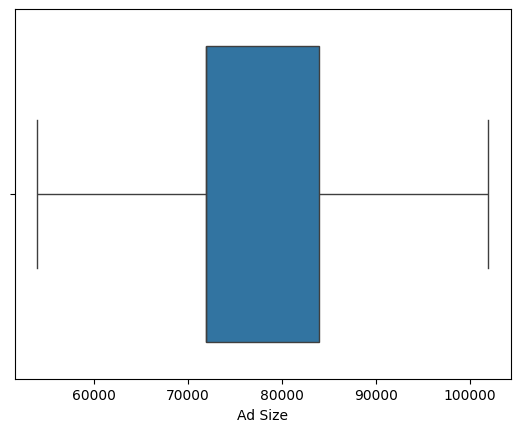

In [ ]:
sns.boxplot(data=df1, x='Ad Size')

In [ ]:
lr,ur=remove_outlier(df1['Available_Impressions'])
print("lower range",lr, "and upper range", ur)

lower range -3707387.0 and upper range 6268771.0


In [ ]:
df1['Available_Impressions']=np.where(df1['Available_Impressions']>ur,ur,df1['Available_Impressions'])
df1['Available_Impressions']=np.where(df1['Available_Impressions']<lr,lr,df1['Available_Impressions'])

<Axes: xlabel='Available_Impressions'>

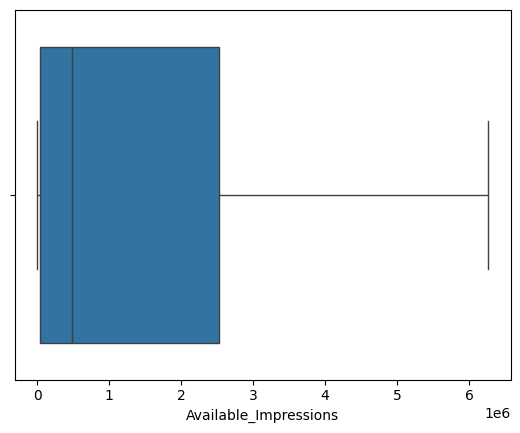

In [ ]:
sns.boxplot(data=df1, x='Available_Impressions')

In [ ]:
lr,ur=remove_outlier(df1['Matched_Queries'])
print("lower range",lr, "and upper range", ur)

lower range -1725343.75 and upper range 2924326.25


In [ ]:
df1['Matched_Queries']=np.where(df1['Matched_Queries']>ur,ur,df1['Matched_Queries'])
df1['Matched_Queries']=np.where(df1['Matched_Queries']<lr,lr,df1['Matched_Queries'])

<Axes: xlabel='Matched_Queries'>

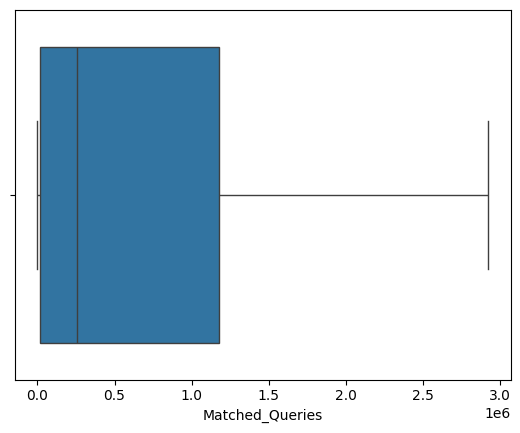

In [ ]:
sns.boxplot(data=df1, x='Matched_Queries')

In [ ]:
lr,ur=remove_outlier(df1['Impressions'])
print("lower range",lr, "and upper range", ur)

lower range -1648666.5 and upper range 2769085.5


In [ ]:
df1['Impressions']=np.where(df1['Impressions']>ur,ur,df1['Impressions'])
df1['Impressions']=np.where(df1['Impressions']<lr,lr,df1['Impressions'])

<Axes: xlabel='Impressions'>

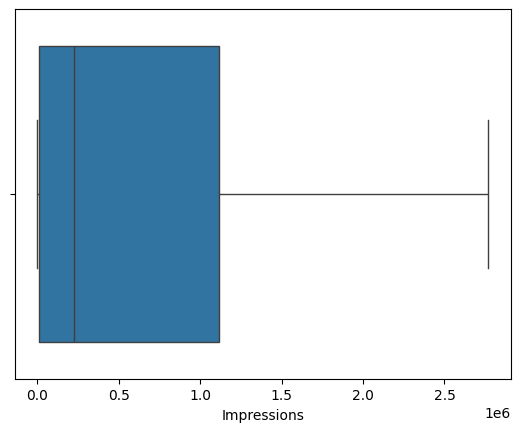

In [ ]:
sns.boxplot(data=df1, x='Impressions')

In [ ]:
lr,ur=remove_outlier(df1['Clicks'])
print("lower range",lr, "and upper range", ur)

lower range 54000.0 and upper range 54000.0


In [ ]:
df1['Clicks']=np.where(df1['Clicks']>ur,ur,df1['Clicks'])
df1['Clicks']=np.where(df1['Clicks']<lr,lr,df1['Clicks'])

<Axes: xlabel='Clicks'>

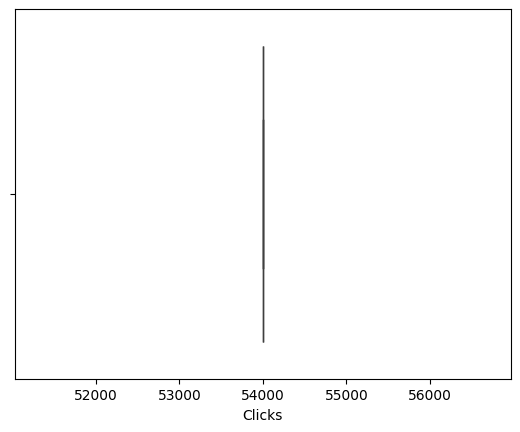

In [ ]:
sns.boxplot(data=df1, x='Clicks')

In [ ]:
lr,ur=remove_outlier(df1['Spend'])
print("lower range",lr, "and upper range", ur)

lower range -4469.15 and upper range 7675.73


In [ ]:
df1['Spend']=np.where(df1['Spend']>ur,ur,df1['Spend'])
df1['Spend']=np.where(df1['Spend']<lr,lr,df1['Spend'])

<Axes: xlabel='Spend'>

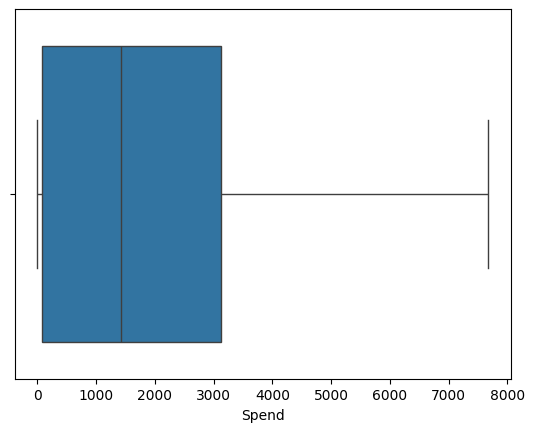

In [ ]:
sns.boxplot(data=df1, x='Spend')

In [ ]:
lr,ur=remove_outlier(df1['Fee'])
print("lower range",lr, "and upper range", ur)

lower range 0.30000000000000004 and upper range 0.3799999999999999


In [ ]:
df1['Fee']=np.where(df1['Fee']>ur,ur,df1['Fee'])
df1['Fee']=np.where(df1['Fee']<lr,lr,df1['Fee'])

<Axes: xlabel='Fee'>

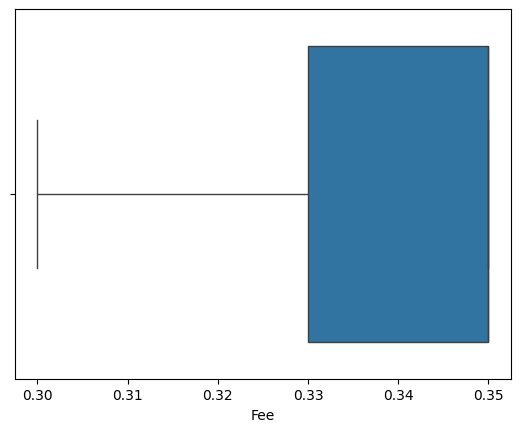

In [ ]:
sns.boxplot(data=df1, x='Fee')

In [ ]:
lr,ur=remove_outlier(df1['Revenue'])
print("lower range",lr, "and upper range", ur)

lower range -2998.5937874999995 and upper range 5145.297312499999


In [ ]:
df1['Revenue']=np.where(df1['Revenue']>ur,ur,df1['Revenue'])
df1['Revenue']=np.where(df1['Revenue']<lr,lr,df1['Revenue'])

<Axes: xlabel='Revenue'>

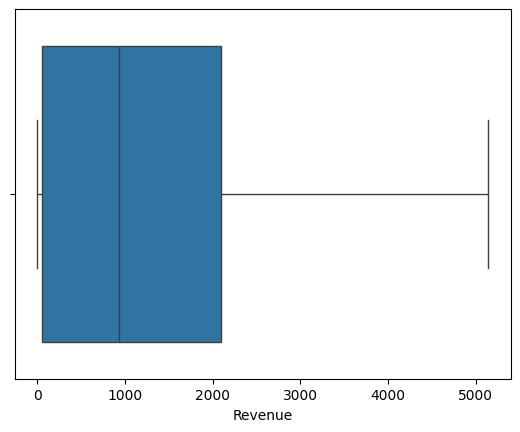

In [ ]:
sns.boxplot(data=df1, x='Revenue')

In [ ]:
lr,ur=remove_outlier(df1['CTR'])
print("lower range",lr, "and upper range", ur)

lower range -0.19543087778859436 and upper range 0.3327876617457427


In [ ]:
df1['CTR']=np.where(df1['CTR']>ur,ur,df1['CTR'])
df1['CTR']=np.where(df1['CTR']<lr,lr,df1['CTR'])

<Axes: xlabel='CTR'>

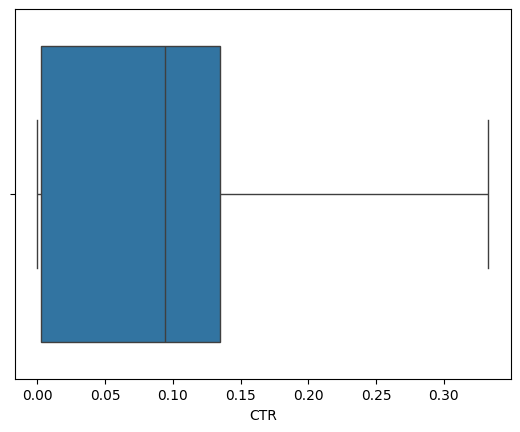

In [ ]:
sns.boxplot(data=df1, x='CTR')

In [ ]:
lr,ur=remove_outlier(df1['CPM'])
print("lower range",lr, "and upper range", ur)

lower range -15.19031633320633 and upper range 29.981418178163874


In [ ]:
df1['CPM']=np.where(df1['CPM']>ur,ur,df1['CPM'])
df1['CPM']=np.where(df1['CPM']<lr,lr,df1['CPM'])

<Axes: xlabel='CPM'>

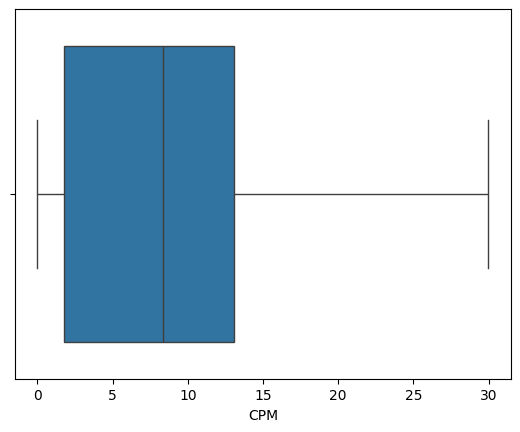

In [ ]:
sns.boxplot(data=df1, x='CPM')

In [ ]:
lr,ur=remove_outlier(df1['CPC'])
print("lower range",lr, "and upper range", ur)

lower range -0.5950238218287072 and upper range 1.2310015773280991


In [ ]:
df1['CPC']=np.where(df1['CPC']>ur,ur,df1['CPC'])
df1['CPC']=np.where(df1['CPC']<lr,lr,df1['CPC'])

<Axes: xlabel='CPC'>

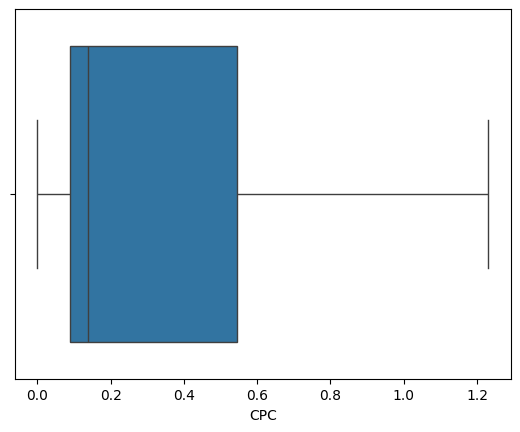

In [ ]:
sns.boxplot(data=df1, x='CPC')

In [ ]:
#Scale the data
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC', 'Clus_kmeans', 'sil_width']


In [ ]:
from scipy.stats import zscore
df_scaled=df1[num].apply(zscore)

In [ ]:
df_scaled.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,2.306600e+04,2.306600e+04,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,0.0,2.306600e+04,2.306600e+04,2.306600e+04,2.306600e+04,2.306600e+04,2.306600e+04
mean,1.281478e-16,-1.182903e-16,3.055833e-16,9.857525e-18,1.971505e-17,0.000000,NaN,-9.857525e-17,1.143473e-15,3.943010e-17,6.900268e-17,-2.025721e-15,3.943010e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022,NaN,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.134891e+00,-1.319110e+00,-1.467840e+00,-7.561823e-01,-7.792648e-01,-0.768806,NaN,-8.931702e-01,-2.222416e+00,-8.800933e-01,-9.950306e-01,-1.051646e+01,-1.042561e+00
25%,-1.134891e+00,-4.327968e-01,-2.975645e-01,-7.403406e-01,-7.614468e-01,-0.760655,NaN,-8.580464e-01,-5.675316e-01,-8.464745e-01,-9.642269e-01,1.516141e-01,-7.590912e-01
50%,-3.644957e-01,-1.865987e-01,-2.975645e-01,-5.285774e-01,-5.277221e-01,-0.538975,NaN,-3.055230e-01,5.357244e-01,-3.176070e-01,1.415239e-01,1.516141e-01,-6.023707e-01
75%,1.433093e+00,1.290590e+00,4.826195e-01,4.330590e-01,3.714976e-01,0.366051,NaN,3.939323e-01,5.357244e-01,3.898027e-01,6.357869e-01,1.516141e-01,6.829874e-01
max,1.467332e+00,1.290590e+00,1.652896e+00,2.193158e+00,2.070914e+00,2.056111,NaN,2.271900e+00,5.357244e-01,2.244218e+00,3.035808e+00,1.516141e-01,2.846105e+00


###Problem 1.3 -
Hierarchical Clustering
- Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Using Ward's Linkage.

In [ ]:
wardlink = linkage(df1[num], method = 'ward')

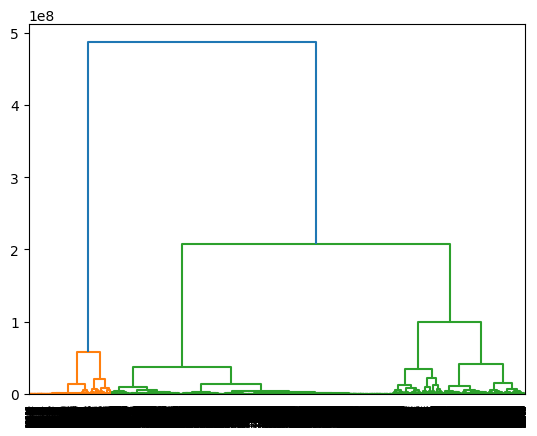

In [ ]:
dend = dendrogram(wardlink)

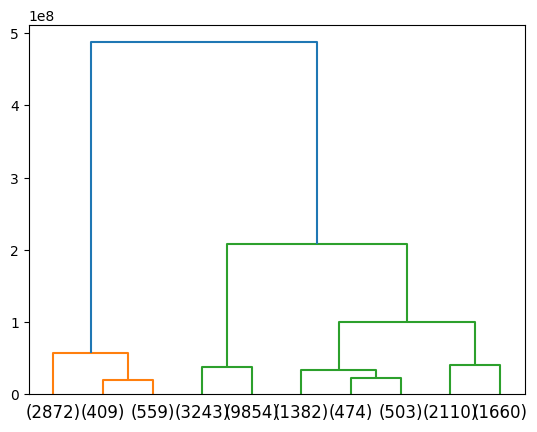

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

The no. of maximum clusters are 5.

Using Euclidean distance.

In [ ]:
wardlink = linkage(df1[num], method = 'ward', metric='euclidean')

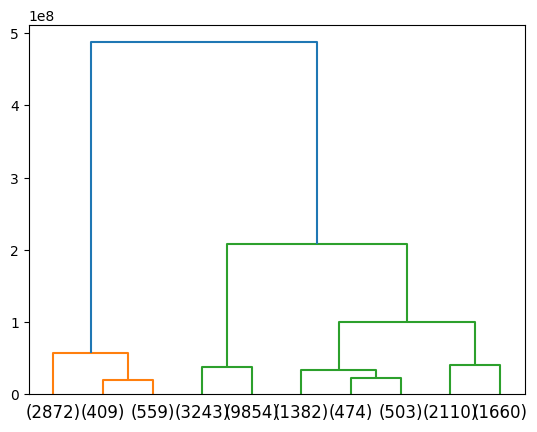

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

###Problem 1.4 -
K-means Clustering
- Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler()

In [ ]:
scaled_df = X.fit_transform(df1[num])

In [ ]:
scaled_df

array([[ -0.3644957 ,  -0.43279676,  -0.10251846, ...,  -0.95883633,
        -10.51645531,  -1.04256138],
       [ -0.3644957 ,  -0.43279676,  -0.10251846, ...,  -0.95383476,
        -10.51645531,  -1.04256138],
       [ -0.3644957 ,  -0.43279676,  -0.10251846, ...,  -0.96221767,
        -10.51645531,  -1.04256138],
       ...,
       [  1.43309269,  -0.18659865,   1.65289551, ...,   3.03580766,
          0.15161415,  -0.88461411],
       [ -1.13489073,   1.29058999,  -0.29756446, ...,   3.03580766,
          0.15161415,  -0.82143521],
       [  1.43309269,  -0.18659865,   1.65289551, ...,   3.03580766,
          0.15161415,  -0.7582563 ]])

In [ ]:
k_means = KMeans(n_clusters = 3)

In [ ]:
k_means.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
wss =[]

In [ ]:
for i in range(1,16):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wss

[276792.0000000009,
 169144.1892301853,
 125663.10606972512,
 95122.37318069712,
 69208.47858823421,
 48377.67963360154,
 39224.83408996463,
 32506.06956195424,
 29103.708575451477,
 26133.058738018946,
 23656.2521981059,
 22031.469374401317,
 19803.468877015453,
 18184.478175669665,
 17413.968252993825]

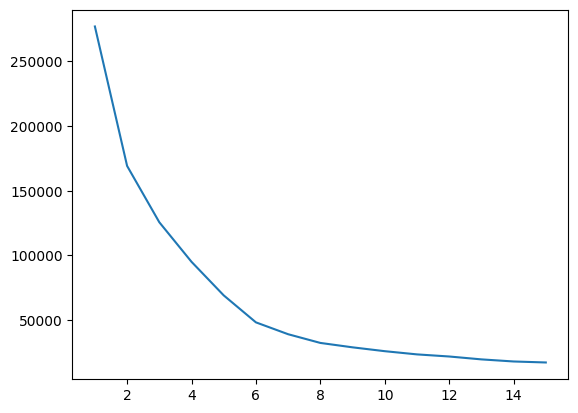

In [ ]:
plt.plot(range(1,16), wss)

In [ ]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1["Clus_kmeans"] = labels
df1.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,...,323.0,54000.0,0.0,0.35,0.0,0.003096,0.0,0.0,5,0.914578
1,2020-9-2-10,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,...,285.0,54000.0,0.0,0.35,0.0,0.003509,0.0,0.0,5,0.914642
2,2020-9-1-22,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,...,355.0,54000.0,0.0,0.35,0.0,0.002817,0.0,0.0,5,0.914509
3,2020-9-3-20,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,...,495.0,54000.0,0.0,0.35,0.0,0.002020,0.0,0.0,5,0.914198
4,2020-9-4-15,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,...,242.0,54000.0,0.0,0.35,0.0,0.004132,0.0,0.0,5,0.914629


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_df,labels)

0.5602709806873191

In [ ]:
sil_width = silhouette_samples(scaled_df,labels)

In [ ]:
df1["sil_width"] = sil_width
df1.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,...,323.0,54000.0,0.0,0.35,0.0,0.003096,0.0,0.0,5,0.915687
1,2020-9-2-10,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,...,285.0,54000.0,0.0,0.35,0.0,0.003509,0.0,0.0,5,0.915750
2,2020-9-1-22,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,...,355.0,54000.0,0.0,0.35,0.0,0.002817,0.0,0.0,5,0.915619
3,2020-9-3-20,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,...,495.0,54000.0,0.0,0.35,0.0,0.002020,0.0,0.0,5,0.915312
4,2020-9-4-15,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,...,242.0,54000.0,0.0,0.35,0.0,0.004132,0.0,0.0,5,0.915737


In [ ]:
df1.to_excel('/content/drive/MyDrive/pca/ad_file.xlsx',index=False)

###Problem 1.5 -
Actionable Insights & Recommendations
- Extract meaningful insights (atleast 3) from the clusters to identify the most effective types of ads, target audiences, or marketing strategies that can be inferred from each segment. - Based on the clustering analysis and key insights, provide actionable recommendations (atleast 3) to Ads24x7 on how to optimize their digital marketing efforts, allocate budgets efficiently, and tailor ad content to specific audience segments.

###Problem 2.1 -
Define the problem and perform Exploratory Data Analysis
- Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

In [37]:
path_excel="/content/drive/MyDrive/pca/pca_india.xlsx"
df2 = pd.read_excel(path_excel)

In [38]:
df2.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
df2.shape

(640, 61)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
df2.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


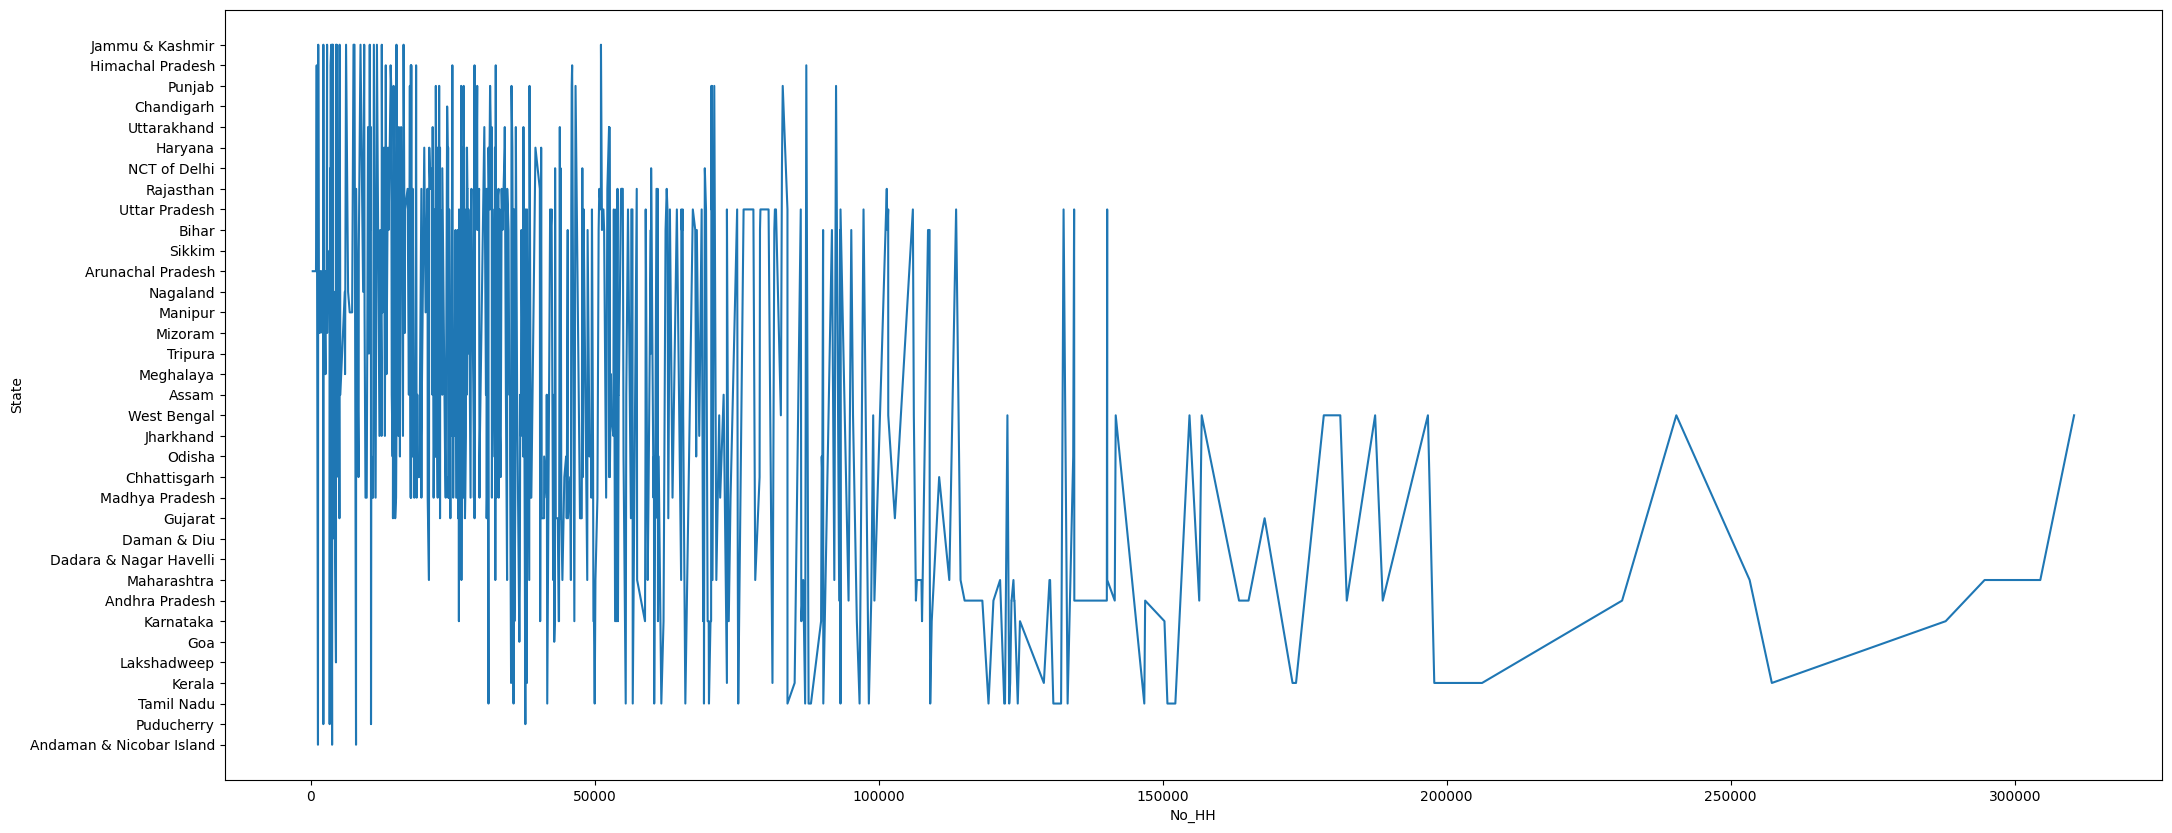

In [ ]:
plt.figure(figsize = (25,10))
sns.lineplot(data = df2 , x = 'No_HH' , y = 'State');

In [ ]:
# Find the row with the maximum number of households
max_household_row = df2[df2['No_HH'] == df2['No_HH'].max()]

if len(max_household_row) > 1:
    print("States with the maximum number of households:")
    print(max_household_row)
else:
    max_household_state = max_household_row['State'].values[0]
    print(f"The state with the maximum number of households is: {max_household_state}")


The state with the maximum number of households is: West Bengal


In [ ]:
# Find the row with the minimum number of households
min_household_row = df2[df2['No_HH'] == df2['No_HH'].min()]

if len(min_household_row) > 1:
    print("States with the minimum number of households:")
    print(min_household_row)
else:
    min_household_state = min_household_row['State'].values[0]
    print(f"The state with the minimum number of households is: {min_household_state}")

The state with the minimum number of households is: Arunachal Pradesh


<Axes: xlabel='M_06'>

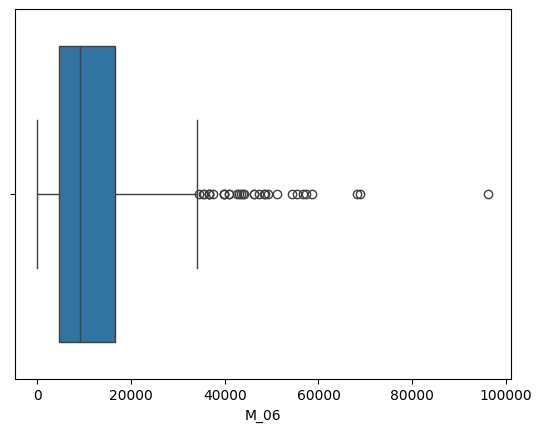

In [ ]:
sns.boxplot(data=df2, x='M_06')

Median No. of male in age group 0-6 is 9159.000000. The highest no. of male in age group in age 0-6 is 96223.000000.

<Axes: xlabel='F_06'>

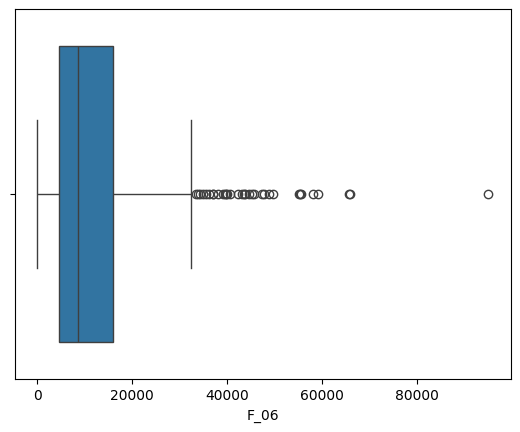

In [ ]:
sns.boxplot(data=df2, x='F_06')

Median No. of female in age group 0-6 is 8663.000000. The highest no. of female in age group in age 0-6 is 95129.000000.

<Axes: xlabel='M_LIT'>

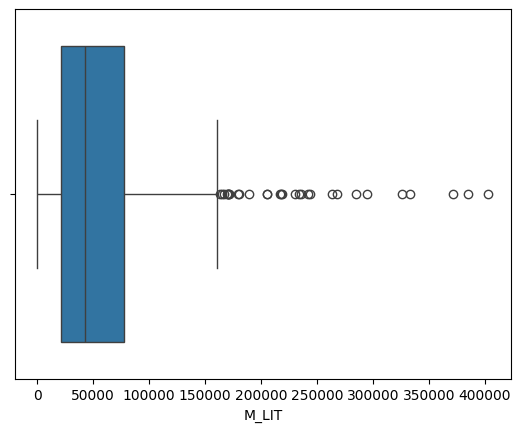

In [ ]:
sns.boxplot(data=df2, x='M_LIT')

In [ ]:
# Find the row with the minimum number of male literate individuals
min_literate_row = df2[df2['M_LIT'] == df2['M_LIT'].min()]


if len(min_literate_row) > 1:
    print("States with the minimum number of literate individuals:")
    print(min_literate_row)
else:
    min_literate_state = min_literate_row['State'].values[0]
    print(f"The state with the minimum number of male literate individuals is: {min_literate_state}")

The state with the minimum number of male literate individuals is: Arunachal Pradesh


<Axes: xlabel='F_LIT'>

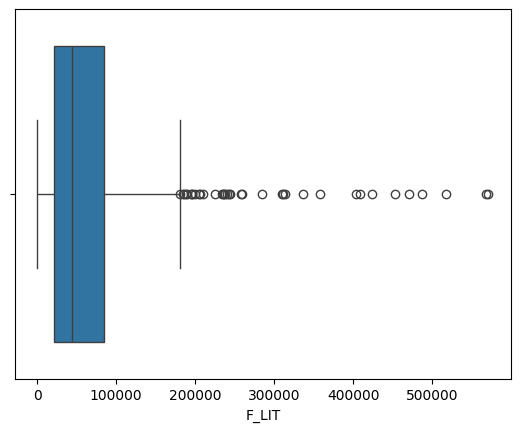

In [ ]:
sns.boxplot(data=df2, x='F_LIT')

In [ ]:
# Find the row with the minimum number of female literate individuals
min_literate_row = df2[df2['F_LIT'] == df2['F_LIT'].min()]


if len(min_literate_row) > 1:
    print("States with the minimum number of literate individuals:")
    print(min_literate_row)
else:
    min_literate_state = min_literate_row['State'].values[0]
    print(f"The state with the minimum number of female literate individuals is: {min_literate_state}")

The state with the minimum number of female literate individuals is: Arunachal Pradesh


###Problem 2 -
Data Preprocessing
- Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers

In [ ]:
df2.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

There is no irregularities present in data.

In [39]:
#dropping columns
df_pca = df2.drop(['State Code','Dist.Code','State','Area Name'], axis = 1)

In [ ]:
df_pca.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


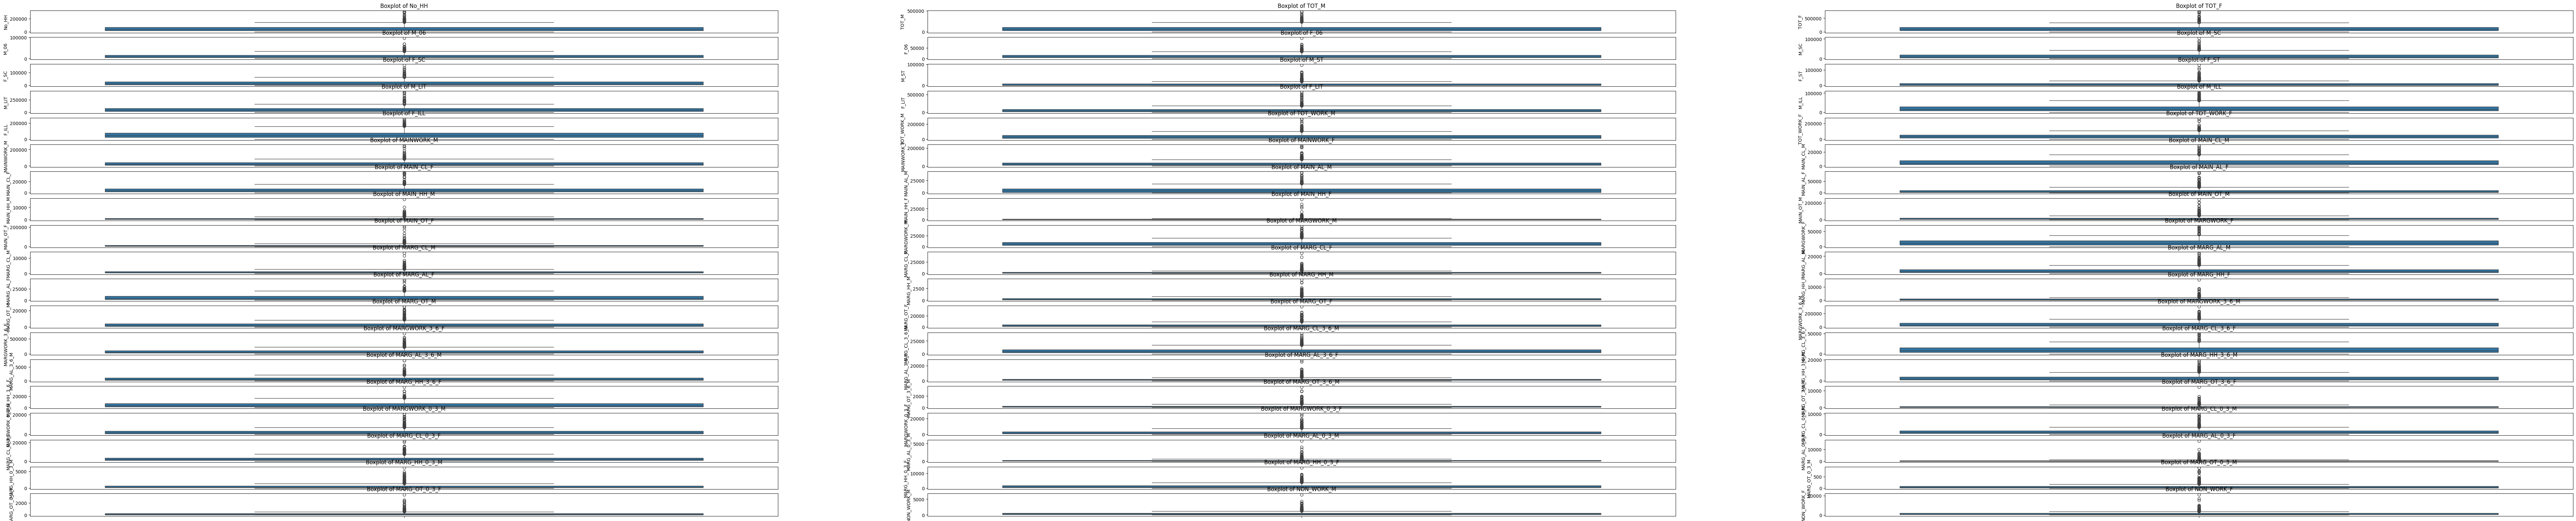

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (100,20))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(19, 3, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))

In [40]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [41]:
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


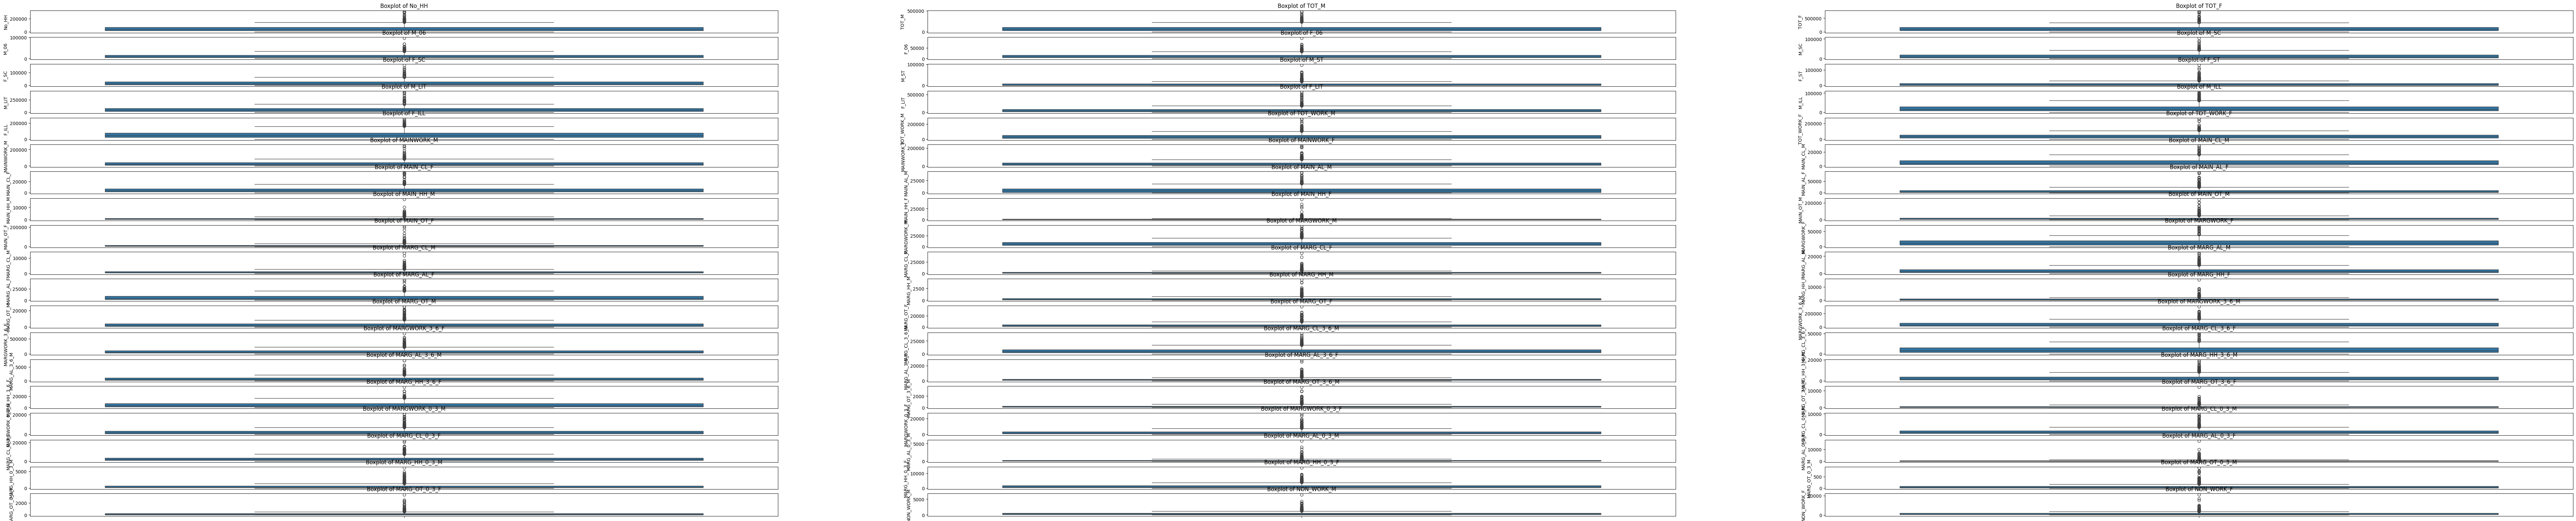

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (100,20))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(19, 3, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))

Outliers are same before and after

###Problem 2.3 -
PCA
- Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

In [43]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [44]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.37643683,  0.15058437, ...,  0.03363703,
        -0.07959556, -0.02552519],
       [-0.        ,  0.2448199 ,  0.09383958, ..., -0.02638552,
        -0.01672564,  0.03567243],
       [-0.        , -0.09325898, -0.0110033 , ...,  0.01165739,
        -0.01279215, -0.00377366]])

In [45]:
#Check the eigen values
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [46]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [53]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14',
                                                'PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22',
                                                'PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                                'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38',
                                                'PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46',
                                                'PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54',
                                                'PC55','PC56','PC57'
                                                ],
                                    index = df_pca_scaled.columns)

In [55]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,3.048575e-01,-1.648761e-01,9.916129e-02,-4.745790e-02,2.258986e-02,2.424957e-01,3.027282e-01,3.764368e-01,2.448199e-01,-9.325898e-02
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,-2.246514e-01,1.097900e-01,2.357431e-01,2.785700e-01,-3.125276e-01,-3.041109e-01,-1.438505e-01,1.505844e-01,9.383958e-02,-1.100330e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,2.844947e-16,3.053113e-16,-3.816392e-17,5.863365e-16,-3.122502e-17,1.526557e-16,7.424616e-16,1.387779e-16,7.598089e-16,1.630640e-16
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,1.873501e-16,-6.002143e-16,-3.452100e-16,-4.093947e-16,-6.938894e-18,6.730727e-16,-3.677614e-16,-5.551115e-16,-6.973588e-16,2.289835e-16
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,-1.526557e-16,-3.885781e-16,-3.070461e-16,-5.525094e-16,-4.189357e-16,-3.122502e-17,7.632783e-17,-3.122502e-16,5.308254e-16,1.752071e-16
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,4.024558e-16,2.740863e-16,2.498002e-16,3.968180e-16,5.316927e-16,1.006140e-16,-4.024558e-16,2.220446e-16,-6.106227e-16,-8.847090e-17
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,-1.013729e-16,5.777713e-16,-1.144917e-16,8.153200e-17,-3.330669e-16,-2.862294e-16,1.960238e-16,3.989864e-16,-5.290907e-16,2.602085e-17
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,3.209238e-17,-4.627375e-16,1.543904e-16,-1.301043e-17,4.406198e-16,1.953732e-16,-6.591949e-17,-2.844947e-16,4.163336e-16,6.201636e-17
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,7.036538e-02,4.720471e-02,6.069743e-02,2.364240e-01,-2.405266e-01,-1.645640e-01,3.729324e-02,-1.338091e-01,-2.134706e-01,-5.415574e-01


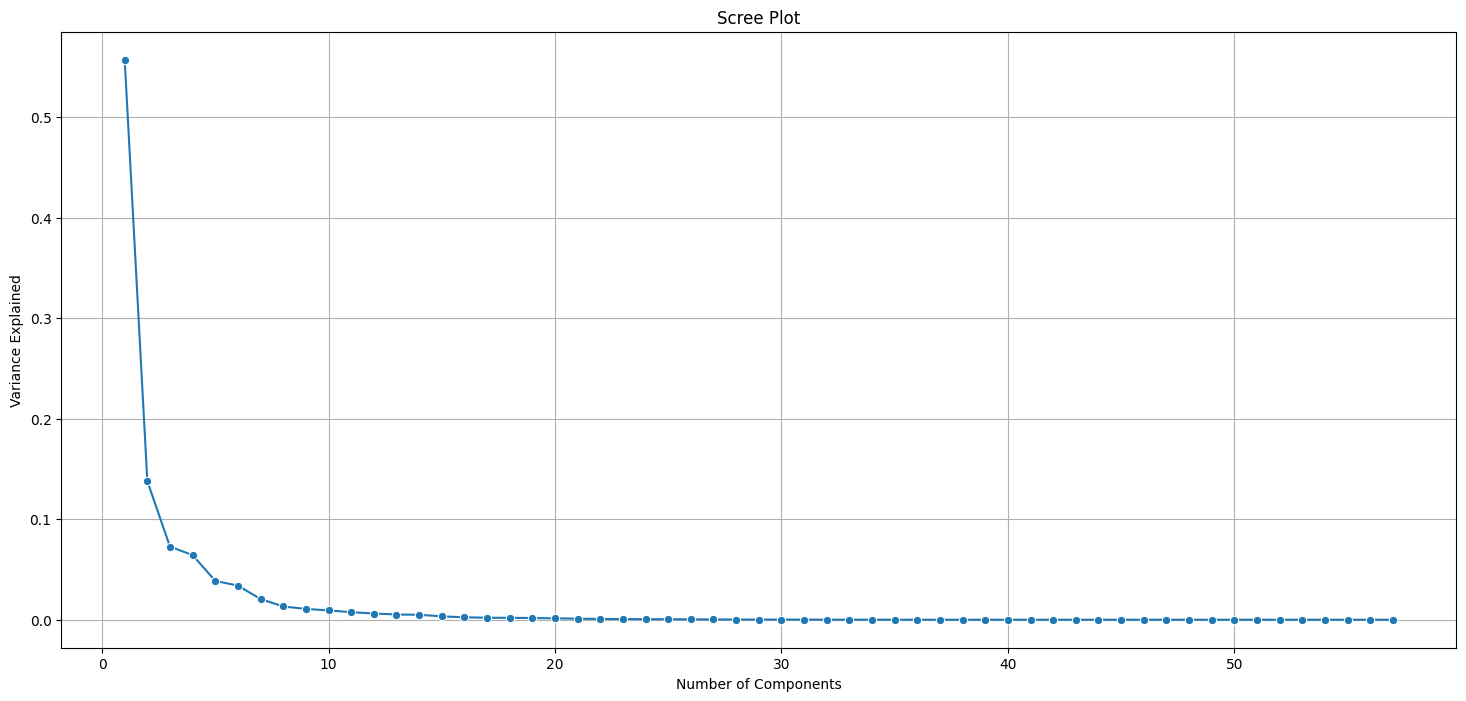

In [47]:
#Create a scree plot
plt.figure(figsize=(18,8))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [48]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [54]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [56]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


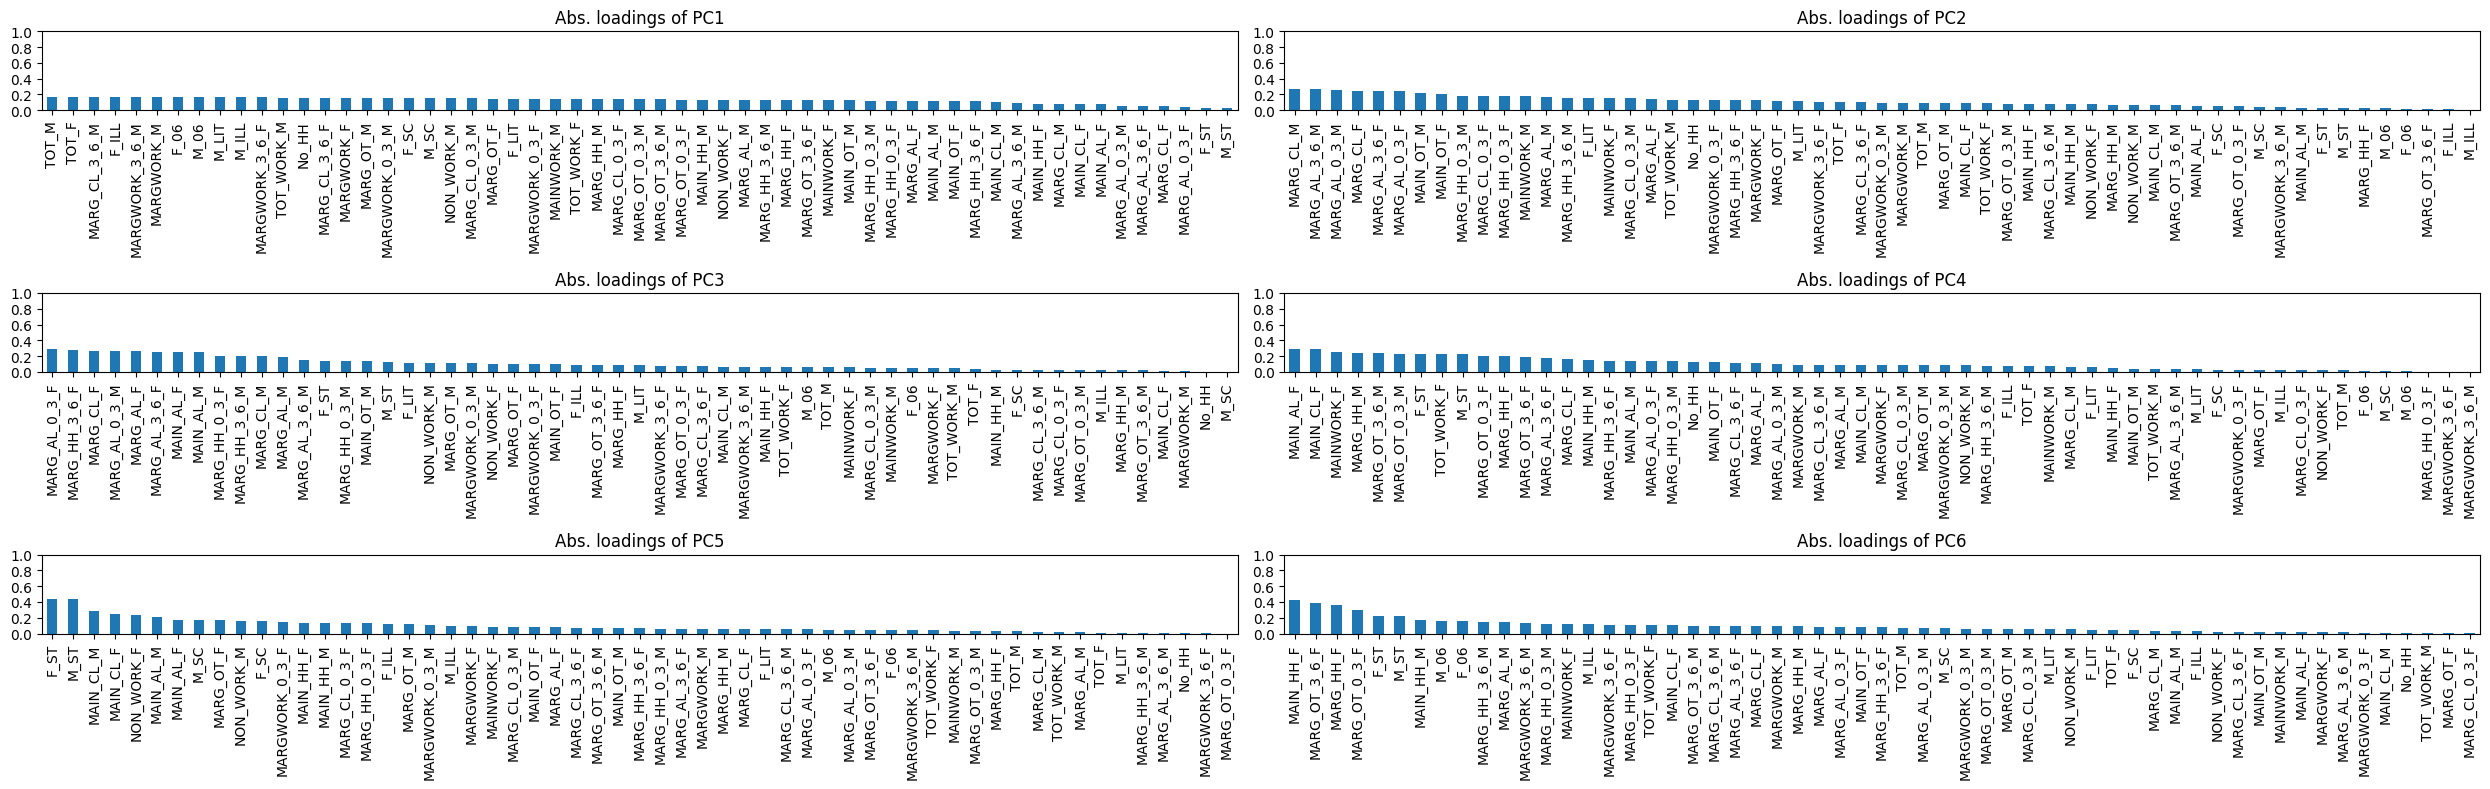

In [59]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (25,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

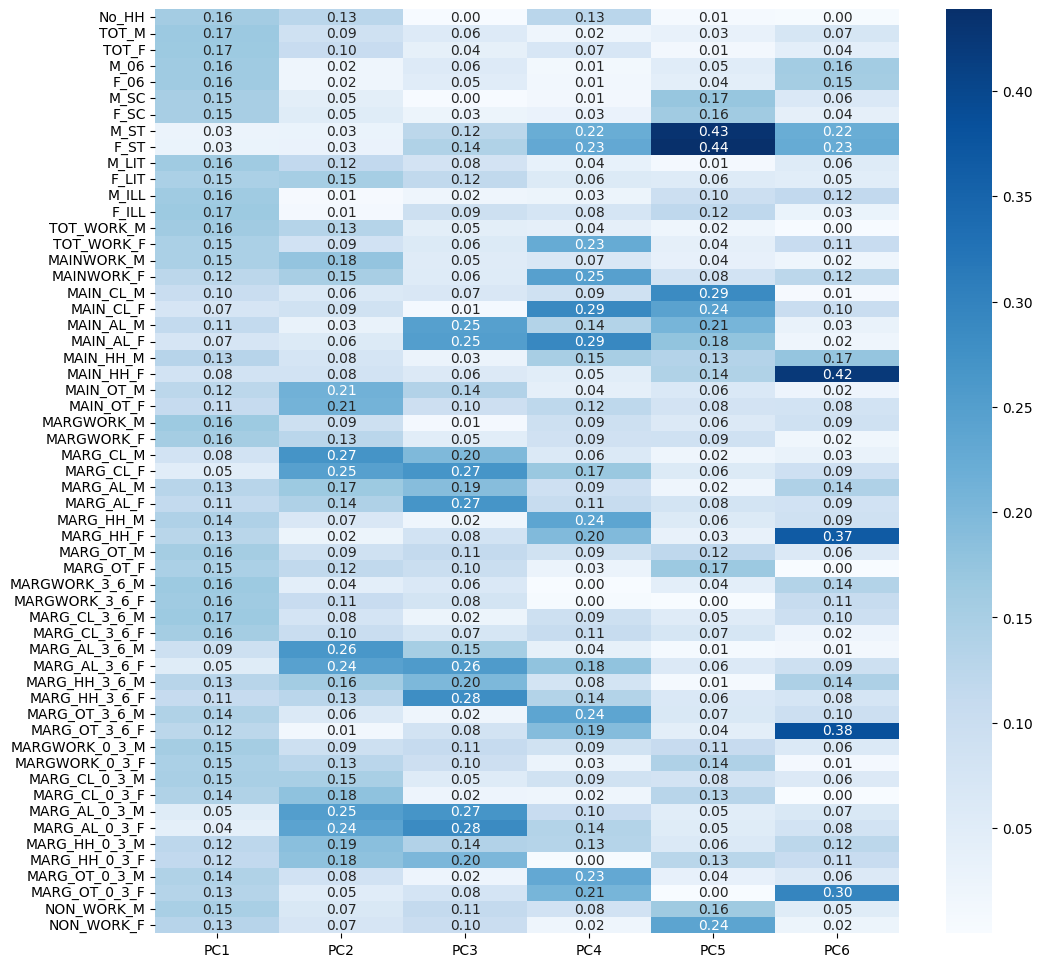

In [61]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,12))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [62]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [63]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
5,-3.319963,2.823865,3.058460,-0.447904,0.742445,0.634676
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455039
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002576


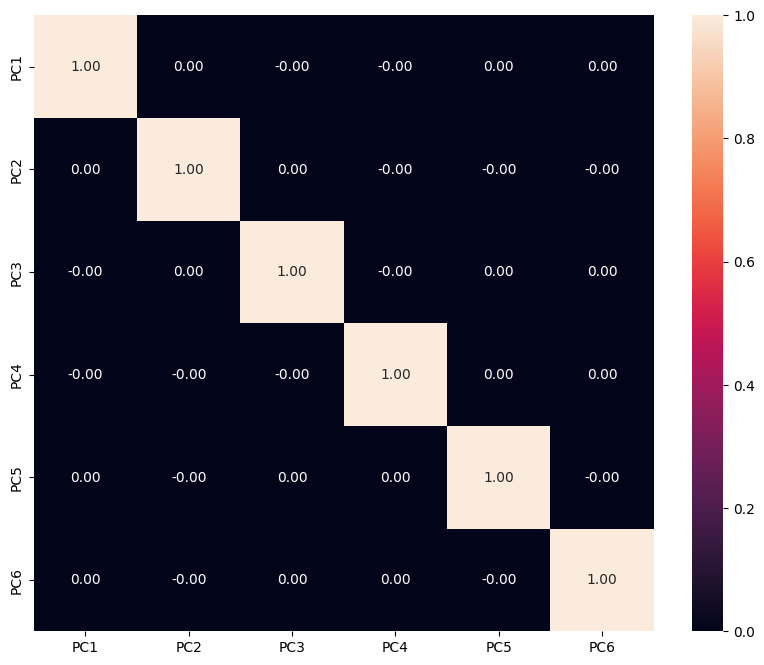

In [64]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');